In [1]:
import numpy as np
import sympy as sp
from sympy import *
from sympy import Matrix
import matplotlib.pyplot as pyplot
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
from numpy import linalg
import cmath
%matplotlib inline
from mpl_toolkits import mplot3d
import time
import numba
#from numba import jit

In [2]:
import nbimporter
import Functions_Hofstatder as Fun_Hof

Importing Jupyter notebook from Functions_Hofstatder.ipynb


# Cylindrical boundary conditions

## Edge states with transfer matrix (based on Hutsigai's paper: Edge States in the IQHE and the Rieman Surface of the Bloch function)

In [3]:
E = Symbol('E')

p = 1
q = 3

Phi = 0

Ly = 192
dky = 2*np.pi/Ly

ky_list = np.arange(-np.pi,np.pi,dky)

eigValues_edge = 1j*np.zeros((len(ky_list),q-1))
i = 0

start = time.time()

for ky in ky_list:
    eigValues_edge[i,:] = Fun_Hof.En_edge(E,ky,p,q,Ly,Phi)
    i += 1
    
print("Execution time:",time.time()-start,"secondes")

Execution time: 35.51787185668945 secondes


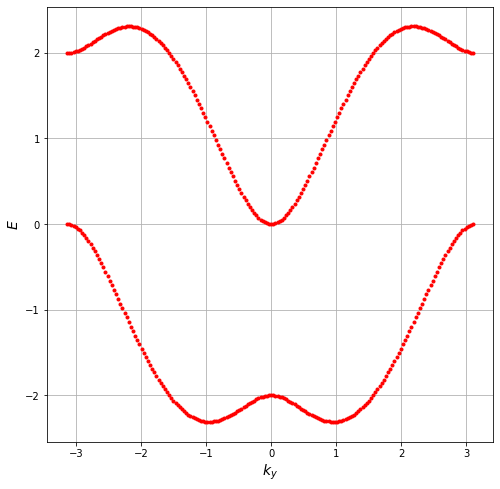

In [4]:
fig_E_edge = pyplot.figure(figsize=(8,8))
ax1 = pyplot.subplot(111)

for l in range(q-1):
    ax1.plot(ky_list,eigValues_edge[:,l].real,'r.',label='$E_{edge,0}(k_y)$')    
ax1.set_xlabel('$k_y$',Fontsize=14)
ax1.set_ylabel('$E$',Fontsize=14)
ax1.grid(axis='both')

## Spectrum and edge states with cylindrical Hofstatder Hamiltonian

In [5]:
start = time.time()

p = 1
q = 3

Lx = 200
Ly = 192
Phi = 0

dky = 2*np.pi/Ly
ky_list = np.arange(-np.pi,np.pi,dky)
#ky_list = np.arange(0,2*np.pi,dky)

eigValues = 1j*np.zeros((Lx,len(ky_list)))

j = 0
for ky in ky_list:        
    eigValues[:,j] = linalg.eigh(Fun_Hof.H_Hofstatder_cylind(Lx,Ly,ky,p,q,Phi))[0]
    j += 1

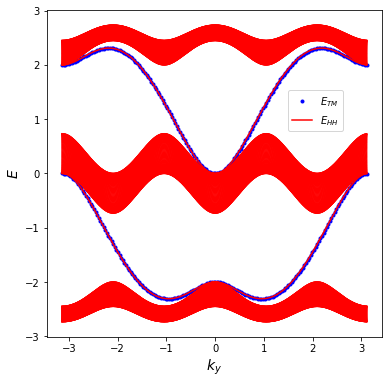

In [6]:
fig_E_edge1 = pyplot.figure(figsize=(6,6))
ax1 = pyplot.subplot(111)

for l in range(q-2):
    ax1.plot(ky_list,eigValues_edge[:,l].real,'b.') 
ax1.plot(ky_list,eigValues_edge[:,-1].real,'b.',label='$E_{TM}$')    
    
ax1.set_xlabel('$k_y$',Fontsize=14)
ax1.set_ylabel('$E$',Fontsize=14)
ax1.grid(axis='both')

for l in range(Lx-1):
    ax1.plot(ky_list,eigValues[l,:].real,'r-')
ax1.plot(ky_list,eigValues[-1,:].real,'r-',label='$E_{HH}$') 
    
ax1.set_xlabel('$k_y$',Fontsize=14)
ax1.set_ylabel('$E$',Fontsize=14)
ax1.grid(axis='both')   
ax1.legend(loc=(0.72,0.63));

In [7]:
fig_E_edge1.savefig("spectrum_cylind.png")

### Edge states

To find the edge states, we must first find the associated eigenvalues. To do this, we choose a certain value of $k_y$ and we detect the eigenvalues that are in a gap. Secondly, by the previous step, we found the number of this eigenvalues; this number corresponds to that of the eigenvector (in the eigenspace of this eigenvalue -- we used this method with the SSH model). 

In [8]:
start = time.time()

p = 1
q = 3

Lx = 200
Ly = 192
Phi = 0

ky = 1

eigValues,eigVectors = linalg.eigh(Fun_Hof.H_Hofstatder_cylind(Lx,Ly,ky,p,q,Phi))

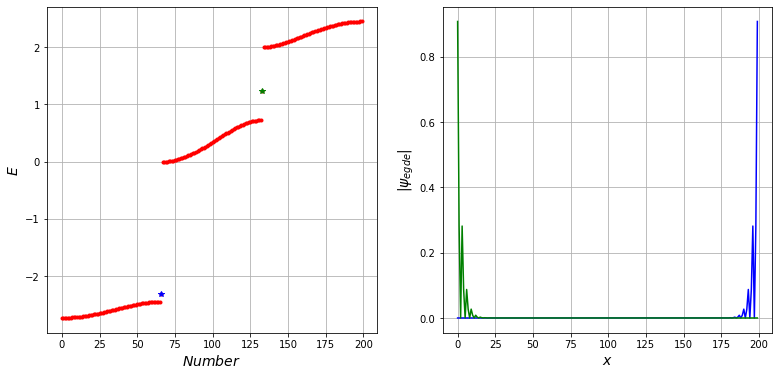

In [9]:
fig_E_edge_2 = pyplot.figure(figsize=(13,6))
ax1 = pyplot.subplot(121)
ax1.plot(eigValues.real,'r.') 
ax1.plot(int(Lx/3),eigValues.real[int(Lx/3)],'b*') 
ax1.plot(2*int(Lx/3)+1,eigValues.real[2*int(Lx/3)+1],'g*') 
ax1.set_xlabel('$Number$',Fontsize=14)
ax1.set_ylabel('$E$',Fontsize=14)
ax1.grid(axis='both')
#ax1.legend();

ax2 = pyplot.subplot(122)
ax2.plot(abs(eigVectors[:,int(Lx/3)]),'b-') 
ax2.plot(abs(eigVectors[:,int(Lx/3)*2+1]),'g-') 
ax2.set_xlabel('$x$',Fontsize=14)
ax2.set_ylabel('$|\psi_{egde}|$',Fontsize=14)
ax2.grid(axis='both')
#ax2.legend();

In [10]:
fig_E_edge_2.savefig("spectrum_edge.png")